In [64]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_context("talk")
sns.set_style("ticks")
sns.set_palette("colorblind")

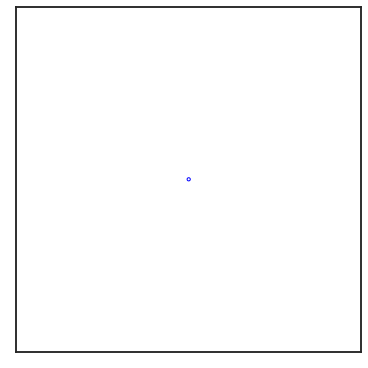

In [65]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
ax.set(xlim=(-1, 1), ylim=(-1, 1), xticks=[], yticks=[])

circle = ax.scatter(0, 0, s=10, lw=1, ec="b", fc="none")

fig.savefig("110_anim_1.png")

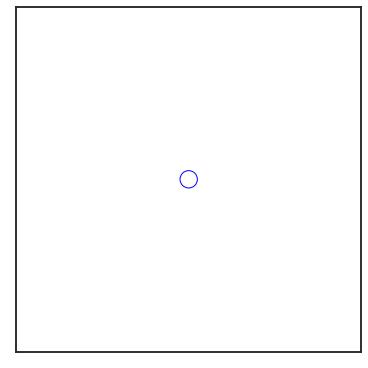

In [6]:
# marker 크기 변경 함수
def update(frame_number):
    circle.set_sizes([frame_number*30])

# marker 크기
update(10)

# 화면 출력
display(fig)

fig.savefig("110_anim_2.png")

MovieWriter ffmpeg unavailable; using Pillow instead.


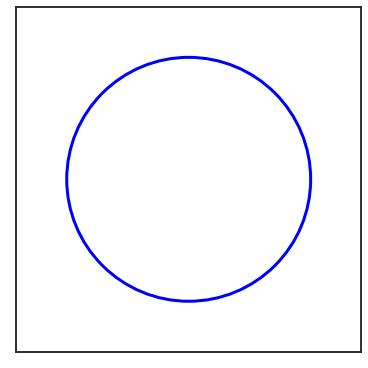

In [8]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)

# Axes 주변부 요소 삭제
ax.set(xlim=(-1, 1), ylim=(-1, 1), xticks=[], yticks=[])

# scatter marker 생성
circle = ax.scatter(0, 0, s=10, lw=3, ec="b", fc="none")

# animation frame마다 적용되는 변화
def update(frame_number):
    # size 변경
    circle.set_sizes([frame_number*500])                    

# animation 객체 생성
anim = FuncAnimation(fig, update, frames=120, interval=5)

# animation을 gif로 저장
anim.save("FuncAni0.gif", fps=24)

MovieWriter ffmpeg unavailable; using Pillow instead.


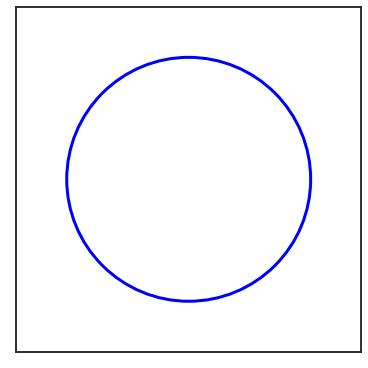

In [9]:
from matplotlib.animation import ArtistAnimation

fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)

# Axes 주변부 요소 삭제
ax.set(xlim=(-1, 1), ylim=(-1, 1), xticks=[], yticks=[])

# animation frame마다 적용되는 변화
circles = []
for frame_number in range(120):
    # scatter marker 생성
    circle = ax.scatter(0, 0, s=10, lw=3, ec="b", fc="none")

    # size 변경
    circle.set_sizes([frame_number*500])                    

    # artist list 추가
    circles.append([circle])

# animation 객체 생성
anim = ArtistAnimation(fig, circles, interval=5)

# animation을 gif로 저장
anim.save("ArtistAni0.gif", fps=24)

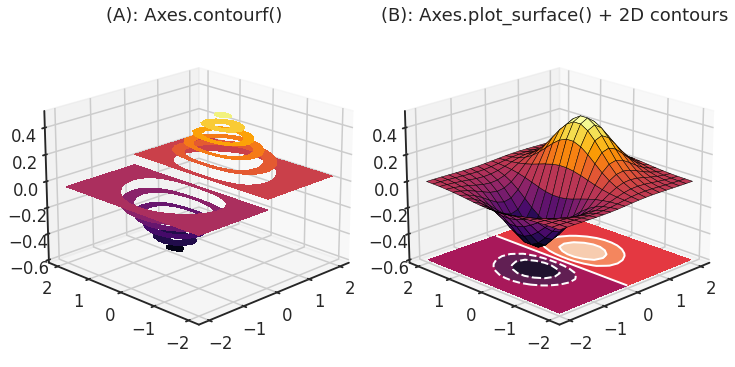

In [72]:
# 2D mesh grid
xx, yy = np.mgrid[-2:2:20j, -2:2:20j]
zz = xx*np.exp(-(xx)**2-yy**2)

# 3D visualization
fig, axs = plt.subplots(ncols=2, figsize=(10, 7), constrained_layout=True, 
                        subplot_kw={"projection":"3d"})

# (A): filled 3D contour
axs[0].contourf(xx, yy, zz, cmap="inferno", levels=10)

# (B): 3D surface plot + 2D contour
axs[1].plot_surface(xx, yy, zz, cmap="inferno", ec="k", linewidths=0.5)
axs[1].contourf(xx, yy, zz, zdir="z", offset=-0.6)
axs[1].contour(xx, yy, zz, zdir="z", offset=-0.6, linewidths=2, colors=["w"])

titles = ["(A): Axes.contourf()", "(B): Axes.plot_surface() + 2D contours"]
for ax, title in zip(axs, titles):
    ax.view_init(azim=225, elev=20)
    ax.set_zlim(-0.6, 0.5)
    ax.set_title(title, pad=0)
    
fig.savefig("110_anim_5.png")

In [73]:
#--------------------------------------------------------------------------
# animation frame마다 적용되는 변화
def update(frame_number):
    axs[0].view_init(azim=225 + frame_number*2)
    axs[1].view_init(azim=225 + frame_number*2)

# animation 객체 생성
anim = FuncAnimation(fig, update, frames=180, interval=5)

# animation을 gif로 저장
anim.save("FuncAni1.gif", fps=24)

MovieWriter ffmpeg unavailable; using Pillow instead.


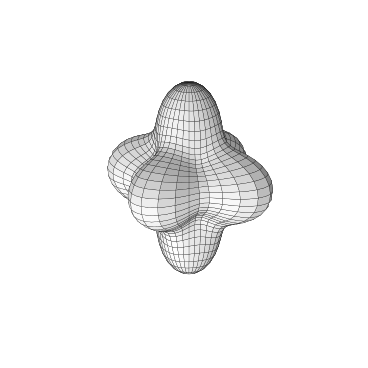

In [70]:
from itertools import product
from matplotlib.colors import LightSource

# angles
polars = np.linspace(0, 179, 37)
azimuths = np.linspace(0, 360, 73)

df = pd.DataFrame(product(polars, azimuths), columns=["azi", "polar"])
df["x"] = df.apply(lambda x: np.cos(np.deg2rad(x[1]))*np.sin(np.deg2rad(x[0])), axis=1)
df["y"] = df.apply(lambda x: np.sin(np.deg2rad(x[1]))*np.sin(np.deg2rad(x[0])), axis=1)
df["z"] = df.apply(lambda x: np.cos(np.deg2rad(x[0])), axis=1)

# 3D 객체 생성
K1_Ni = -0.5 
K2_Ni = -0.2
def calc_uni(K1, K2, df):
    return K1*(df["x"]**2 + df["y"]**2)

def calc_cubic(K1, K2, df):
    return K1*(df["x"]**2 * df["y"]**2 + \
               df["y"]**2 * df["z"]**2 + \
               df["z"]**2 * df["x"]**2) + \
           K2*(df["x"]**2 * df["y"]**2 * df["z"]**2)

df["E_Ni"] = df.apply(lambda x: calc_cubic(K1_Ni, K2_Ni, x), axis=1)*3 +1

# 극좌표계를 직교좌표계로 변환
df["x_Ni"] = df["E_Ni"] * df["x"]
df["y_Ni"] = df["E_Ni"] * df["y"]
df["z_Ni"] = df["E_Ni"] * df["z"]

fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True,
                       subplot_kw={"projection": "3d"})
ax.plot_surface(df[f"x_Ni"].values.reshape((37, 73)), 
                    df[f"y_Ni"].values.reshape((37, 73)), 
                    df[f"z_Ni"].values.reshape((37, 73)), 
                    ec="k", lw=0.2,
                    color="w", lightsource=LightSource(0, 10))

ax.set_box_aspect((1, 1, 1))
elev0, azim0 = 20, -60
ax.view_init(elev0, azim0)
ax.axis(False)

fig.savefig("110_anim_3.png")

In [71]:
frames = 360
elev = elev0 + np.random.normal(loc=3, scale=1, size=frames).cumsum()
azim = azim0 + np.random.normal(loc=3, scale=1, size=frames).cumsum()

# animation frame마다 적용되는 변화
def update(frame_number):
    ax.view_init(elev[frame_number],
                 azim[frame_number])

# animation 객체 생성
anim = FuncAnimation(fig, update, frames=360, interval=5)

# animation을 gif로 저장
anim.save("FuncAni2.gif", fps=24)

MovieWriter ffmpeg unavailable; using Pillow instead.
